In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

In [27]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('/content/drive/MyDrive/OCR Project(SMU)/Images_20k/000015.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

(320, 320, 3)
<PIL.Image.Image image mode=RGB size=320x320 at 0x7FCC4B05BA90>


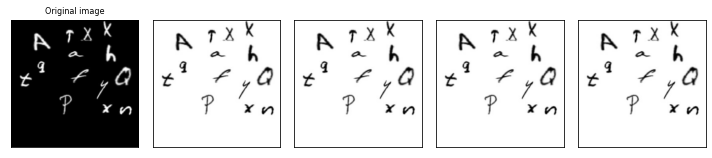

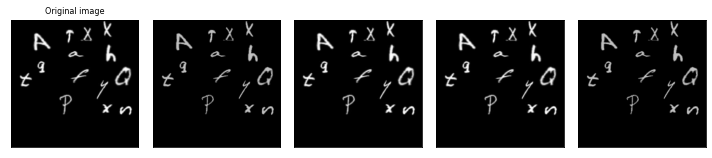

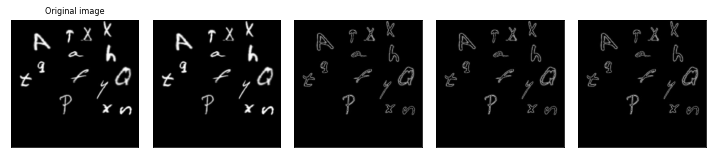

In [34]:
im = Image.open('/content/drive/MyDrive/OCR Project(SMU)/Images_20k/000015.jpg')
im = im.convert('RGB')
data1 = np.array(im)

print(data1.shape)

pil_image = T.ToPILImage(mode=None)(data1)
print(pil_image)

inverter = T.RandomInvert()
invertered_imgs = [inverter(pil_image) for _ in range(4)]
plot(invertered_imgs)

posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(pil_image) for _ in range(4)]
plot(posterized_imgs)

solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(pil_image) for _ in range(4)]
plot(solarized_imgs)

[AutoAugment(policy=AutoAugmentPolicy.CIFAR10, fill=None), AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None), AutoAugment(policy=AutoAugmentPolicy.SVHN, fill=None)]


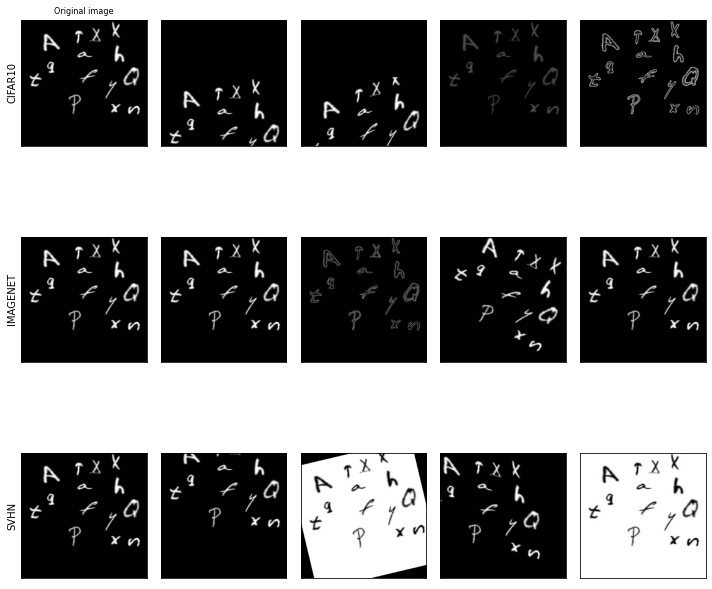

In [36]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]

imgs = [
    [augmenter(pil_image) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)